### 평가지표

In [1]:
import os
import json
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def normalize_label(label):
    label = label.lower().strip()
    if label in {"yes", "no", "maybe"}:
        return label
    if "not prepared" in label or "urgent measures" in label:
        return "no"
    elif "well positioned" in label or "can cope" in label or "ready" in label:
        return "yes"
    else:
        return "error"

def evaluate_result_file(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)

    preds = [normalize_label(ex["prediction"]) for ex in data]
    labels = [normalize_label(ex["label"]) for ex in data]

    acc = round(accuracy_score(labels, preds), 4)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro', zero_division=0)

    filename = os.path.basename(filepath)

    if "metaicl_model_" in filename:
        model_num = filename.split("metaicl_model_")[1].split("_")[0]
        model = f"metaicl_{model_num}"
        k = filename.split("eval_k")[1].split(".")[0] if "eval_k" in filename else "NA"
    else:
        model = filename.split("results_")[1].split("_k")[0]
        k = filename.split("_k")[1].split(".")[0]

    return {
        "file": filename,
        "model": model,
        "k": int(k),
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


def summarize_all_results(file_list):
    all_metrics = [evaluate_result_file(f) for f in file_list]
    df = pd.DataFrame(all_metrics)
    return df


In [2]:
import os
import glob  # glob 모듈 임포트

# 평가 결과가 저장된 폴더
results_dir = "../new_results"

# 결과 파일 리스트 가져오기 (glob.glob을 써야 함)
result_files = sorted(glob.glob(os.path.join(results_dir, "results_*.json")))

df_result = summarize_all_results(result_files)
df_result.sort_values(by=["accuracy"], inplace=True)
df_result

,file,model,k,accuracy,precision,recall,f1
3,results_ia3_k2.json,ia3,2,0.65,0.564246,0.585434,0.561558
9,results_metaicl_model_k0_eval_k2.json,metaicl_k0,2,0.65,0.559028,0.554202,0.549181
15,results_metaicl_model_k16_eval_k2.json,metaicl_k16,2,0.65,0.559028,0.554202,0.549181
21,results_metaicl_model_k1_eval_k2.json,metaicl_k1,2,0.65,0.559028,0.554202,0.549181
27,results_metaicl_model_k2_eval_k2.json,metaicl_k2,2,0.65,0.559028,0.554202,0.549181
45,results_qwen_k2.json,qwen,2,0.65,0.559028,0.554202,0.549181
39,results_metaicl_model_k8_eval_k2.json,metaicl_k8,2,0.65,0.559028,0.554202,0.549181
33,results_metaicl_model_k4_eval_k2.json,metaicl_k4,2,0.65,0.559028,0.554202,0.549181
20,results_metaicl_model_k1_eval_k16.json,metaicl_k1,16,0.66,0.821839,0.458754,0.461944
26,results_metaicl_model_k2_eval_k16.json,metaicl_k2,16,0.66,0.821839,0.458754,0.461944


### 표

In [3]:
df_result[df_result['model'] == 'qwen'].sort_index()

,file,model,k,accuracy,precision,recall,f1
42,results_qwen_k0.json,qwen,0,0.79,0.724475,0.586204,0.599680
43,results_qwen_k1.json,qwen,1,0.69,0.598795,0.624230,0.598571
44,results_qwen_k16.json,qwen,16,0.66,0.821839,0.458754,0.461944
45,results_qwen_k2.json,qwen,2,0.65,0.559028,0.554202,0.549181
46,results_qwen_k4.json,qwen,4,0.69,0.453838,0.510854,0.477273
47,results_qwen_k8.json,qwen,8,0.68,0.462222,0.474090,0.457843


In [4]:
df_result[df_result['model'] == 'ia3'].sort_index()

,file,model,k,accuracy,precision,recall,f1
0,results_ia3_k0.json,ia3,0,0.78,0.729952,0.576401,0.592764
1,results_ia3_k1.json,ia3,1,0.67,0.587723,0.608473,0.582179
2,results_ia3_k16.json,ia3,16,0.68,0.821034,0.482213,0.492932
3,results_ia3_k2.json,ia3,2,0.65,0.564246,0.585434,0.561558
4,results_ia3_k4.json,ia3,4,0.70,0.464986,0.524510,0.486582
5,results_ia3_k8.json,ia3,8,0.72,0.481230,0.521008,0.498969


In [5]:
df_result[df_result['model'] == 'metaicl_k0'].sort_index()

,file,model,k,accuracy,precision,recall,f1
6,results_metaicl_model_k0_eval_k0.json,metaicl_k0,0,0.79,0.724475,0.586204,0.599680
7,results_metaicl_model_k0_eval_k1.json,metaicl_k0,1,0.69,0.598795,0.624230,0.598571
8,results_metaicl_model_k0_eval_k16.json,metaicl_k0,16,0.66,0.821839,0.458754,0.461944
9,results_metaicl_model_k0_eval_k2.json,metaicl_k0,2,0.65,0.559028,0.554202,0.549181
10,results_metaicl_model_k0_eval_k4.json,metaicl_k0,4,0.69,0.453838,0.510854,0.477273
11,results_metaicl_model_k0_eval_k8.json,metaicl_k0,8,0.68,0.462222,0.474090,0.457843


In [6]:
df_result[df_result['model'] == 'metaicl_k1'].sort_index()

,file,model,k,accuracy,precision,recall,f1
18,results_metaicl_model_k1_eval_k0.json,metaicl_k1,0,0.79,0.724475,0.586204,0.599680
19,results_metaicl_model_k1_eval_k1.json,metaicl_k1,1,0.69,0.598795,0.624230,0.598571
20,results_metaicl_model_k1_eval_k16.json,metaicl_k1,16,0.66,0.821839,0.458754,0.461944
21,results_metaicl_model_k1_eval_k2.json,metaicl_k1,2,0.65,0.559028,0.554202,0.549181
22,results_metaicl_model_k1_eval_k4.json,metaicl_k1,4,0.69,0.453838,0.510854,0.477273
23,results_metaicl_model_k1_eval_k8.json,metaicl_k1,8,0.68,0.462222,0.474090,0.457843


In [7]:
df_result[df_result['model'] == 'metaicl_k2'].sort_index()

,file,model,k,accuracy,precision,recall,f1
24,results_metaicl_model_k2_eval_k0.json,metaicl_k2,0,0.79,0.724475,0.586204,0.599680
25,results_metaicl_model_k2_eval_k1.json,metaicl_k2,1,0.69,0.598795,0.624230,0.598571
26,results_metaicl_model_k2_eval_k16.json,metaicl_k2,16,0.66,0.821839,0.458754,0.461944
27,results_metaicl_model_k2_eval_k2.json,metaicl_k2,2,0.65,0.559028,0.554202,0.549181
28,results_metaicl_model_k2_eval_k4.json,metaicl_k2,4,0.69,0.453838,0.510854,0.477273
29,results_metaicl_model_k2_eval_k8.json,metaicl_k2,8,0.68,0.462222,0.474090,0.457843


In [8]:
df_result[df_result['model'] == 'metaicl_k4'].sort_index()

,file,model,k,accuracy,precision,recall,f1
30,results_metaicl_model_k4_eval_k0.json,metaicl_k4,0,0.79,0.724475,0.586204,0.599680
31,results_metaicl_model_k4_eval_k1.json,metaicl_k4,1,0.69,0.598795,0.624230,0.598571
32,results_metaicl_model_k4_eval_k16.json,metaicl_k4,16,0.66,0.821839,0.458754,0.461944
33,results_metaicl_model_k4_eval_k2.json,metaicl_k4,2,0.65,0.559028,0.554202,0.549181
34,results_metaicl_model_k4_eval_k4.json,metaicl_k4,4,0.69,0.453838,0.510854,0.477273
35,results_metaicl_model_k4_eval_k8.json,metaicl_k4,8,0.68,0.462222,0.474090,0.457843


In [9]:
df_result[df_result['model'] == 'metaicl_k8'].sort_index()

,file,model,k,accuracy,precision,recall,f1
36,results_metaicl_model_k8_eval_k0.json,metaicl_k8,0,0.79,0.724475,0.586204,0.599680
37,results_metaicl_model_k8_eval_k1.json,metaicl_k8,1,0.69,0.598795,0.624230,0.598571
38,results_metaicl_model_k8_eval_k16.json,metaicl_k8,16,0.66,0.821839,0.458754,0.461944
39,results_metaicl_model_k8_eval_k2.json,metaicl_k8,2,0.65,0.559028,0.554202,0.549181
40,results_metaicl_model_k8_eval_k4.json,metaicl_k8,4,0.69,0.453838,0.510854,0.477273
41,results_metaicl_model_k8_eval_k8.json,metaicl_k8,8,0.68,0.462222,0.474090,0.457843


In [10]:
df_result[df_result['model'] == 'metaicl_k16'].sort_index()

,file,model,k,accuracy,precision,recall,f1
12,results_metaicl_model_k16_eval_k0.json,metaicl_k16,0,0.79,0.724475,0.586204,0.599680
13,results_metaicl_model_k16_eval_k1.json,metaicl_k16,1,0.69,0.598795,0.624230,0.598571
14,results_metaicl_model_k16_eval_k16.json,metaicl_k16,16,0.66,0.821839,0.458754,0.461944
15,results_metaicl_model_k16_eval_k2.json,metaicl_k16,2,0.65,0.559028,0.554202,0.549181
16,results_metaicl_model_k16_eval_k4.json,metaicl_k16,4,0.69,0.453838,0.510854,0.477273
17,results_metaicl_model_k16_eval_k8.json,metaicl_k16,8,0.68,0.462222,0.474090,0.457843


### 그래프

/tmp/ipykernel_3733/3442653334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['model'] = pd.Categorical(df_k['model'], categories=model_order, ordered=True)
/tmp/ipykernel_3733/3442653334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")
/tmp/ipykernel_3733/3442653334.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')


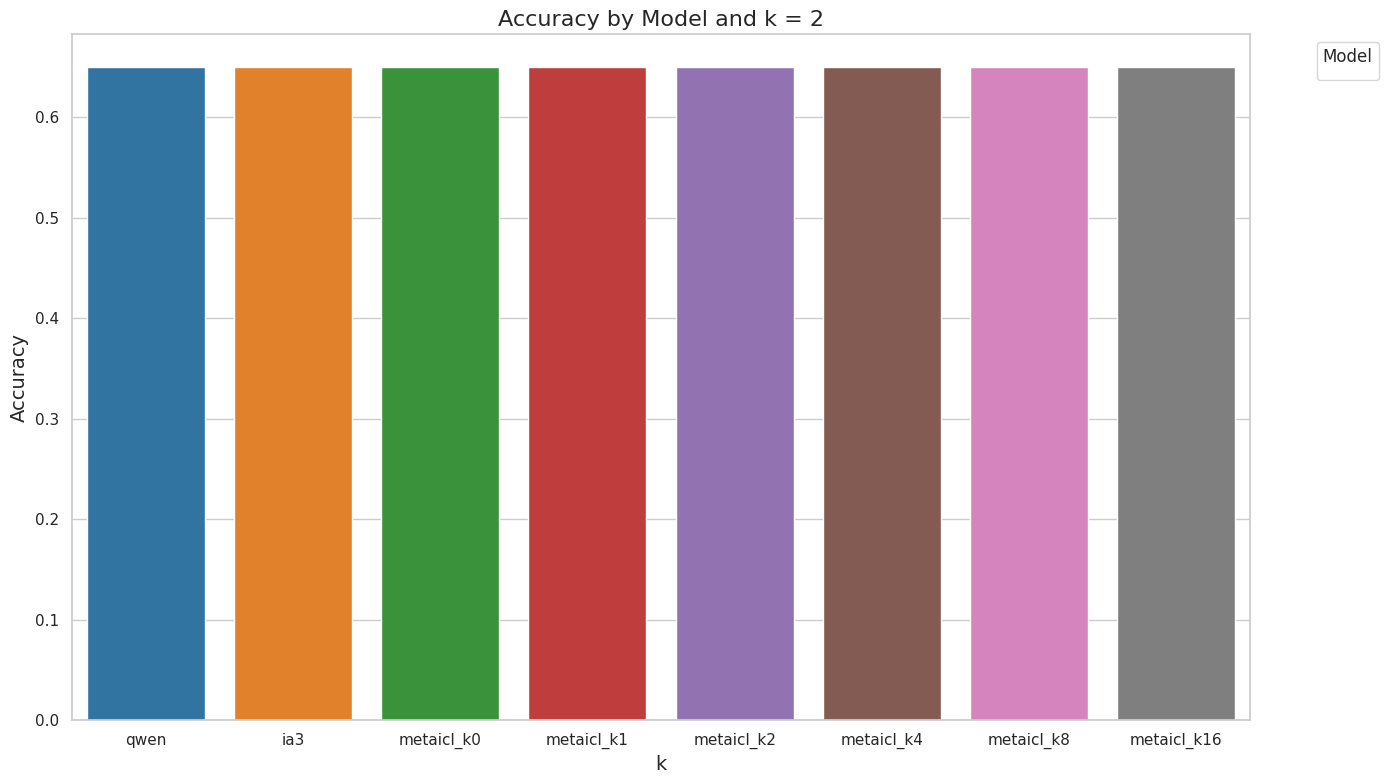

/tmp/ipykernel_3733/3442653334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['model'] = pd.Categorical(df_k['model'], categories=model_order, ordered=True)
/tmp/ipykernel_3733/3442653334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")
/tmp/ipykernel_3733/3442653334.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')


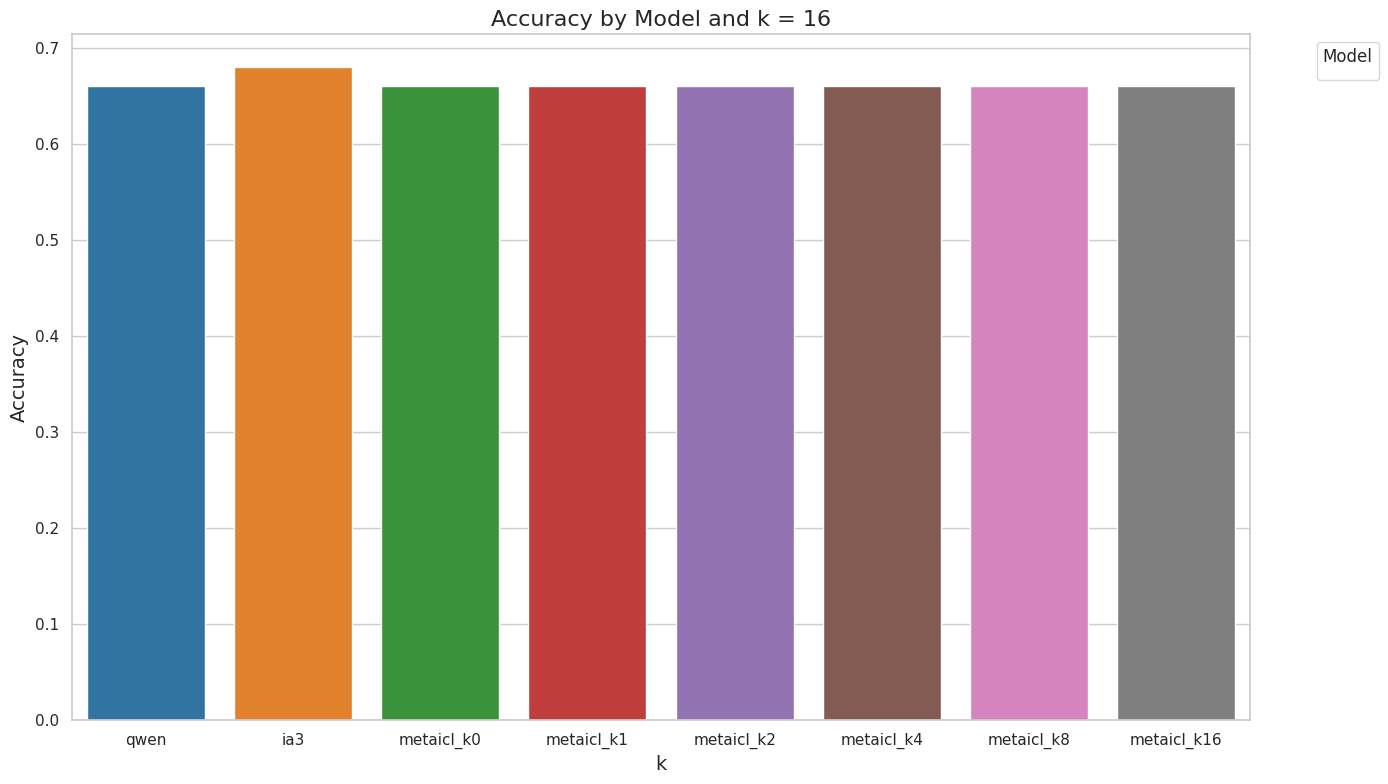

/tmp/ipykernel_3733/3442653334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['model'] = pd.Categorical(df_k['model'], categories=model_order, ordered=True)
/tmp/ipykernel_3733/3442653334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")
/tmp/ipykernel_3733/3442653334.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')


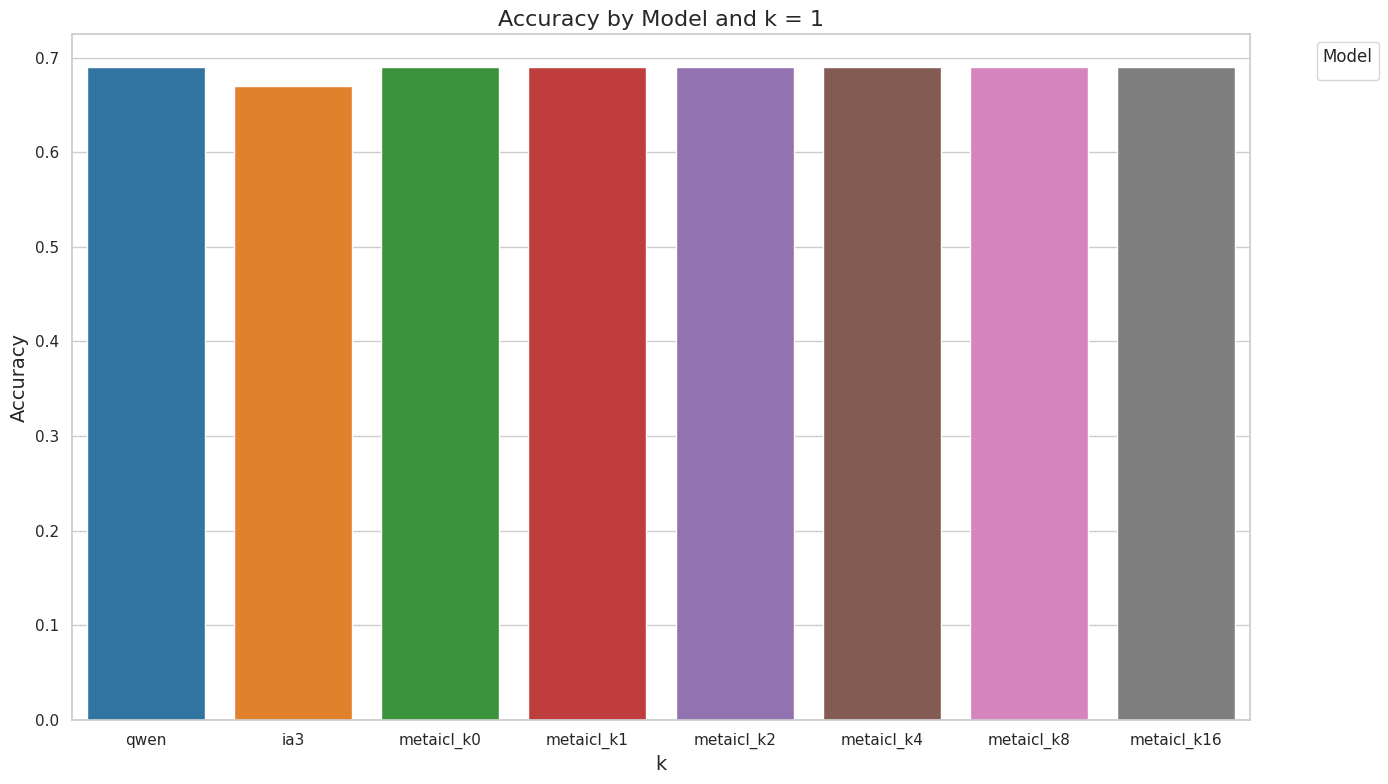

/tmp/ipykernel_3733/3442653334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['model'] = pd.Categorical(df_k['model'], categories=model_order, ordered=True)
/tmp/ipykernel_3733/3442653334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")
/tmp/ipykernel_3733/3442653334.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')


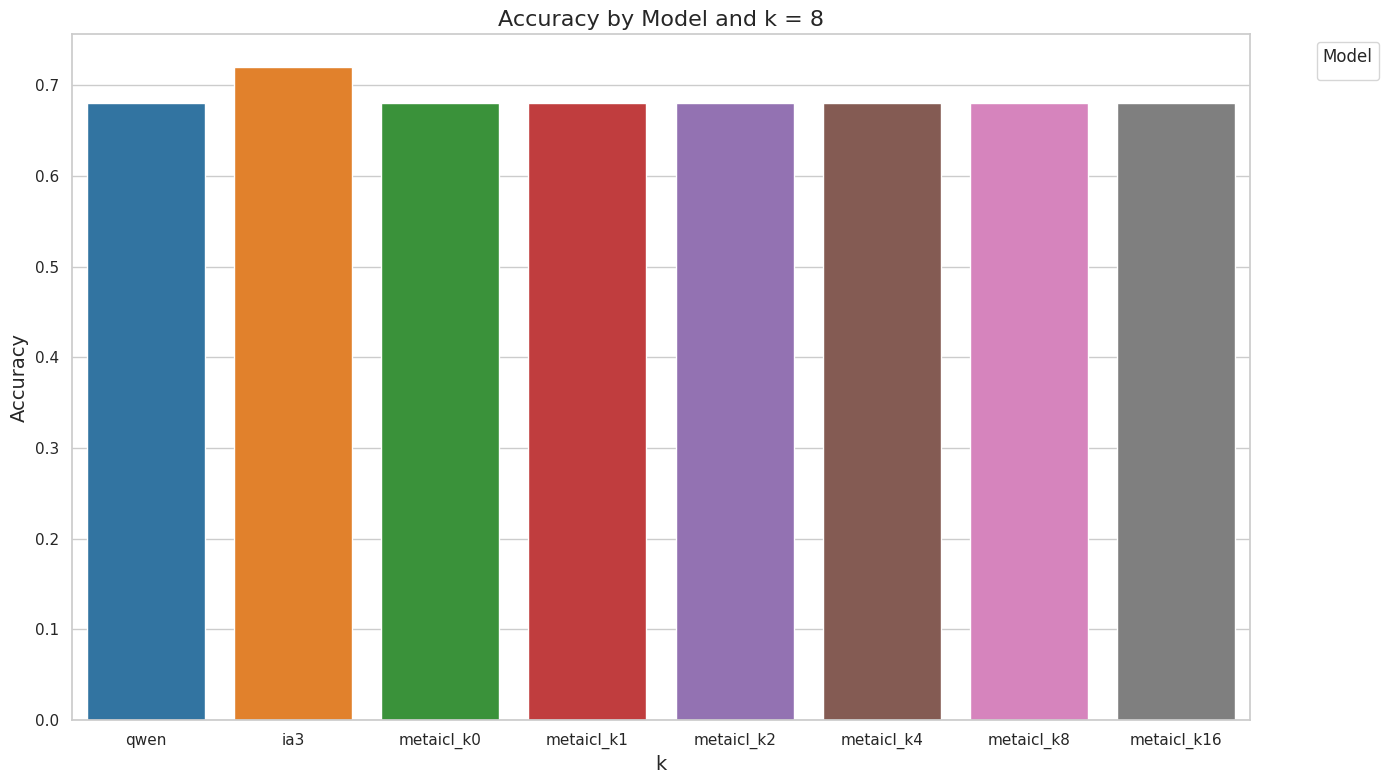

/tmp/ipykernel_3733/3442653334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['model'] = pd.Categorical(df_k['model'], categories=model_order, ordered=True)
/tmp/ipykernel_3733/3442653334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")
/tmp/ipykernel_3733/3442653334.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')


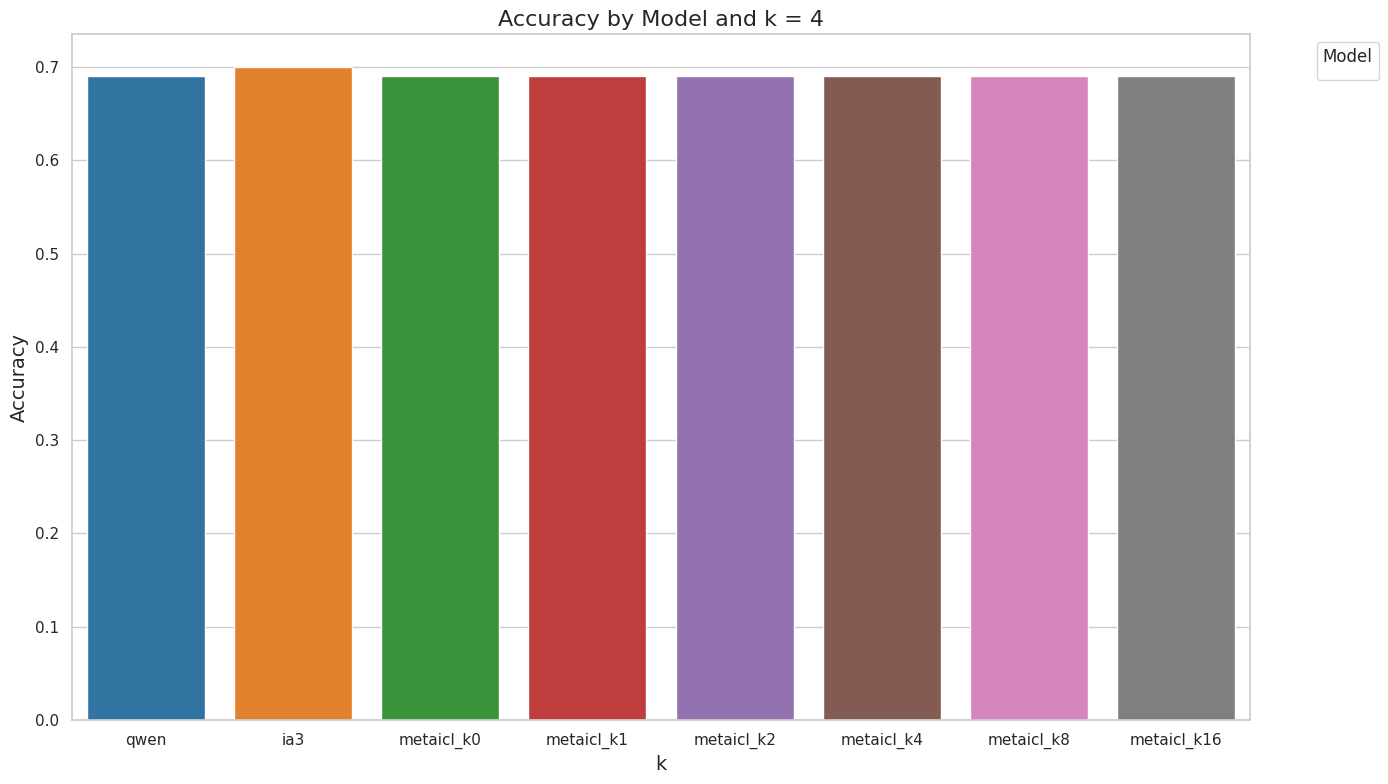

/tmp/ipykernel_3733/3442653334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['model'] = pd.Categorical(df_k['model'], categories=model_order, ordered=True)
/tmp/ipykernel_3733/3442653334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")
/tmp/ipykernel_3733/3442653334.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')


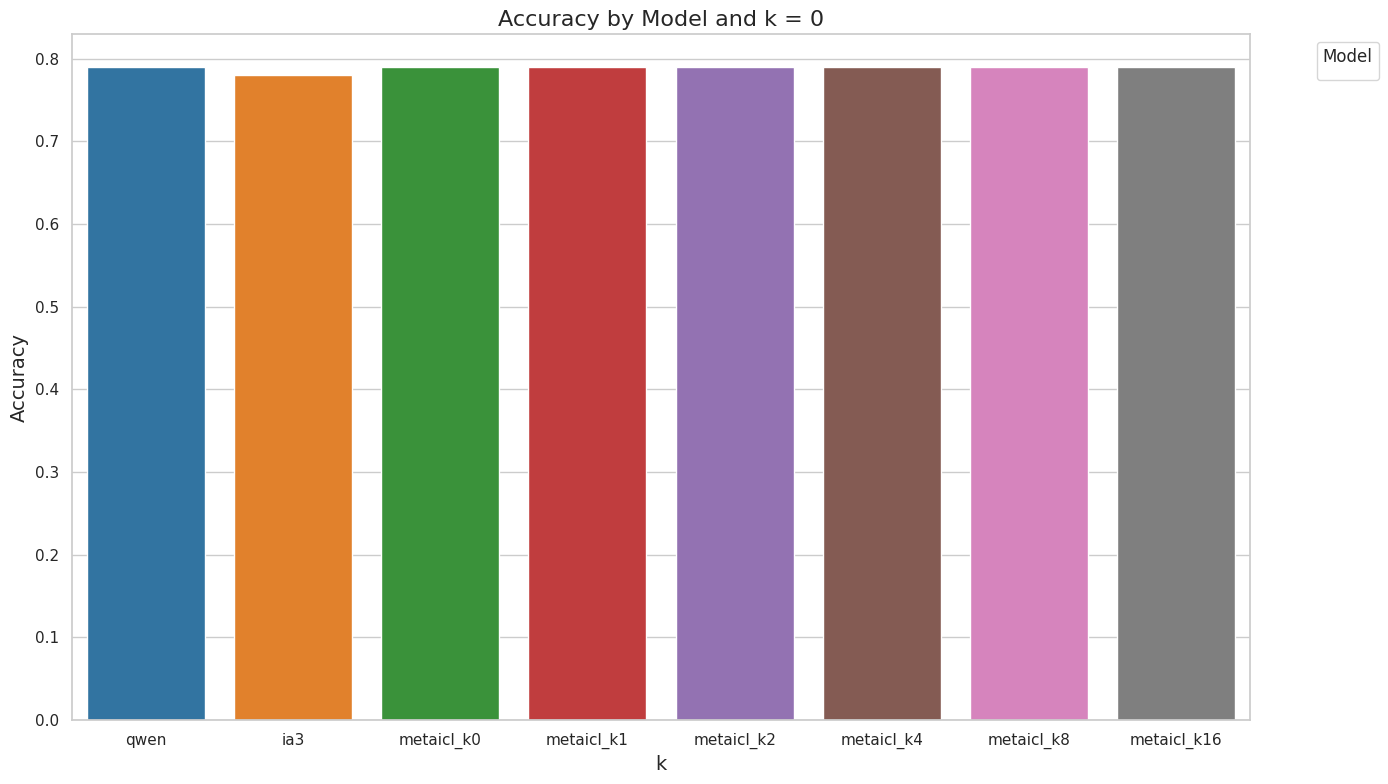

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 원하는 모델 순서 지정
model_order = ['qwen', 'ia3', 'metaicl_k0','metaicl_k1', 'metaicl_k2', 'metaicl_k4', 'metaicl_k8', 'metaicl_k16']

for k in df_result['k'].unique():
    # k 값에 해당하는 데이터 필터링
    df_k = df_result[df_result['k'] == k]

    # model 컬럼을 범주형으로 변환, 순서 지정
    df_k['model'] = pd.Categorical(df_k['model'], categories=model_order, ordered=True)
    
    # 모델별 Accuracy 시각화
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")

    plt.title(f"Accuracy by Model and k = {k}", fontsize=16)
    plt.xlabel("k", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


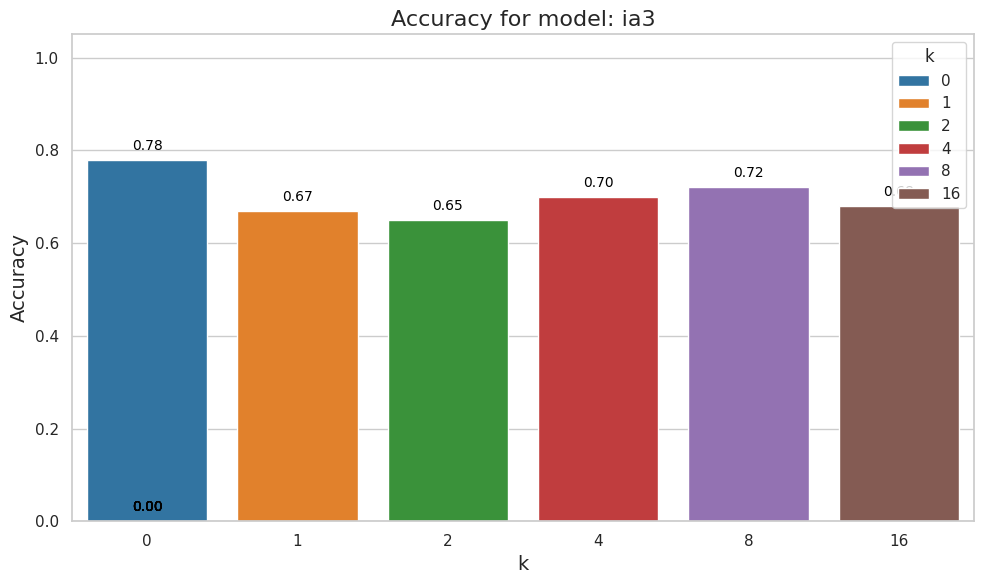

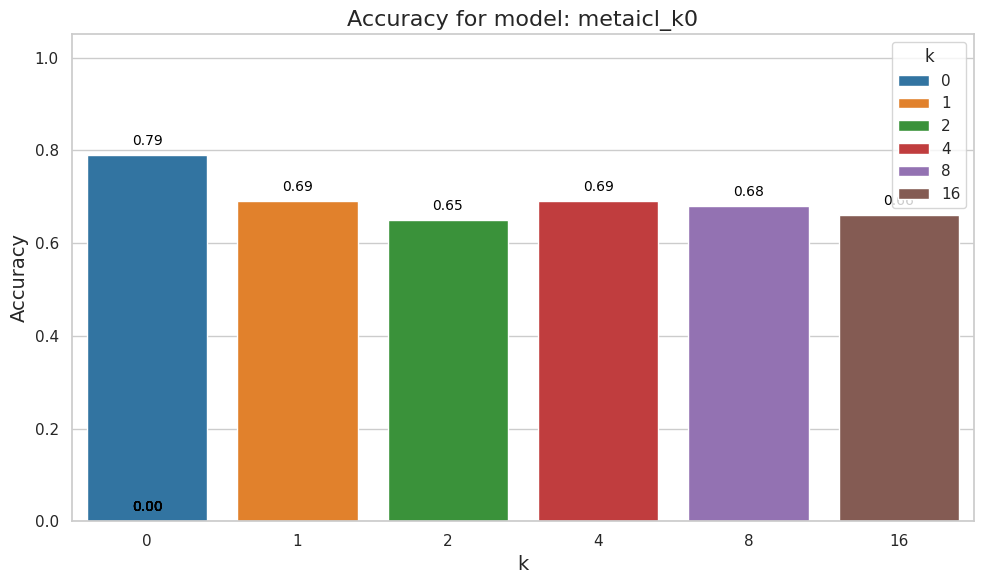

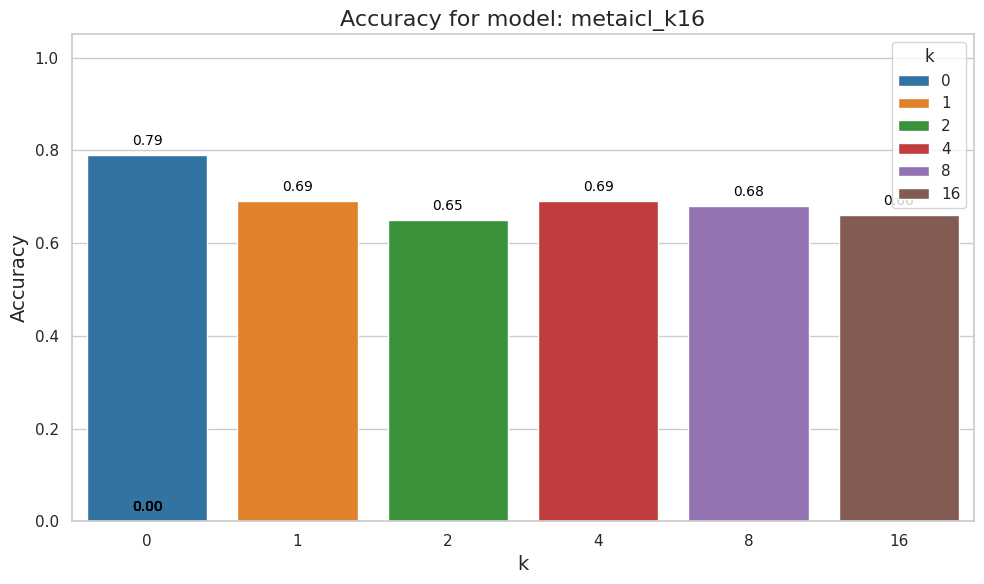

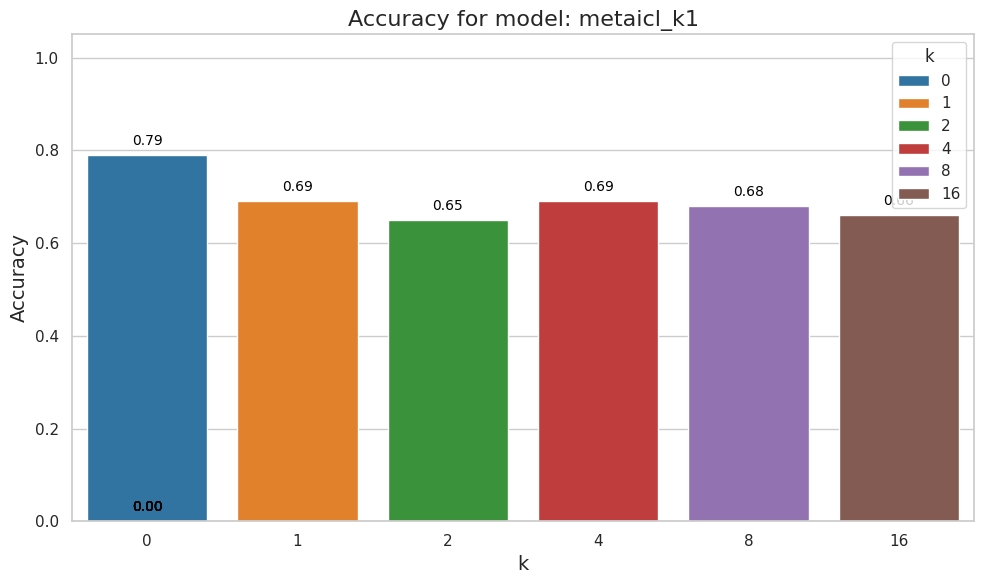

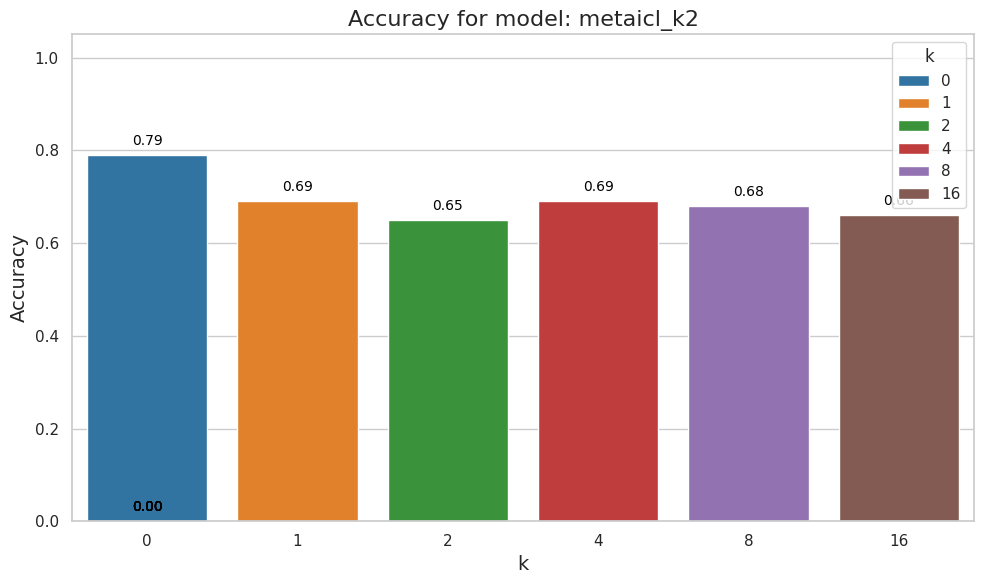

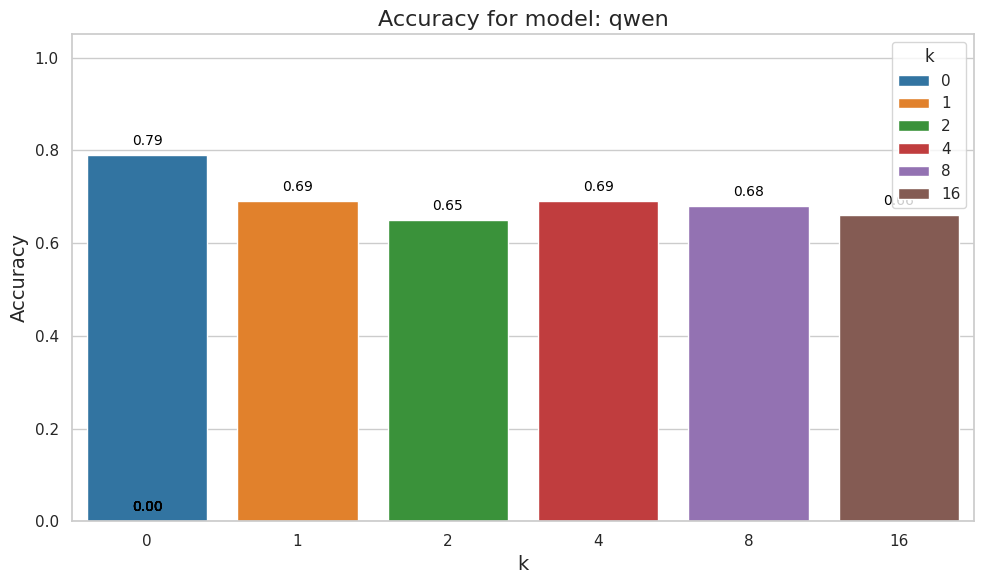

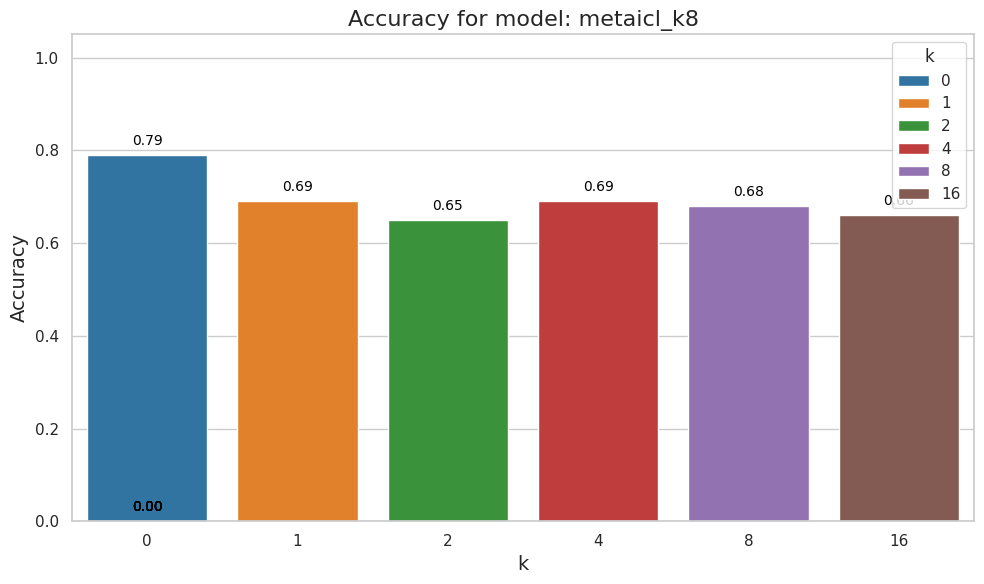

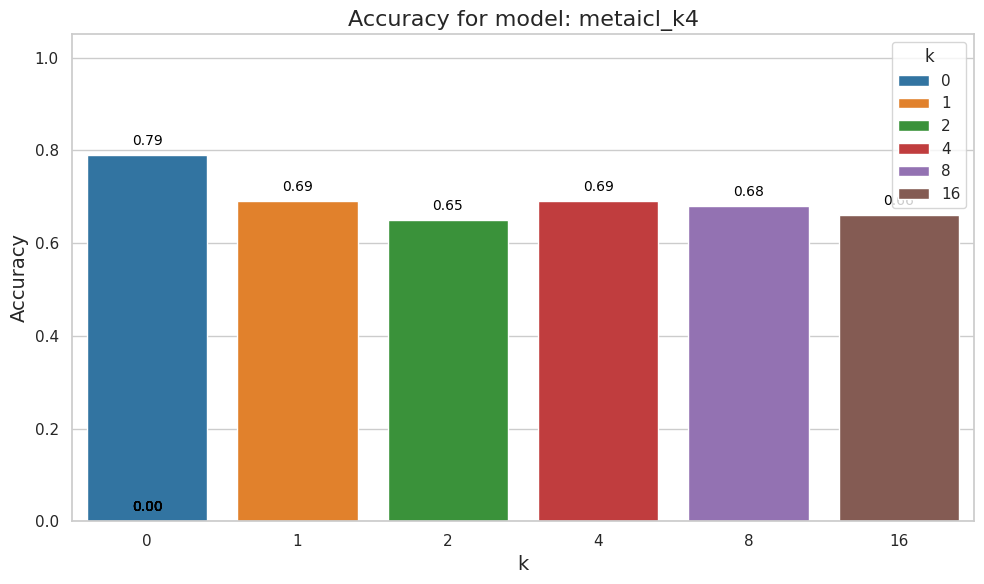

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for model_name in df_result['model'].unique():
    df_model = df_result[df_result['model'] == model_name]

    plt.figure(figsize=(10, 6))
    
    # 막대그래프
    ax = sns.barplot(data=df_model, x="k", y="accuracy", hue="k", palette="tab10")
    
    # 각 막대 위에 정확도 값 표시
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')
    
    plt.title(f"Accuracy for model: {model_name}", fontsize=16)
    plt.xlabel("k", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.ylim(0, 1.05)
    plt.legend(title="k", loc='upper right')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


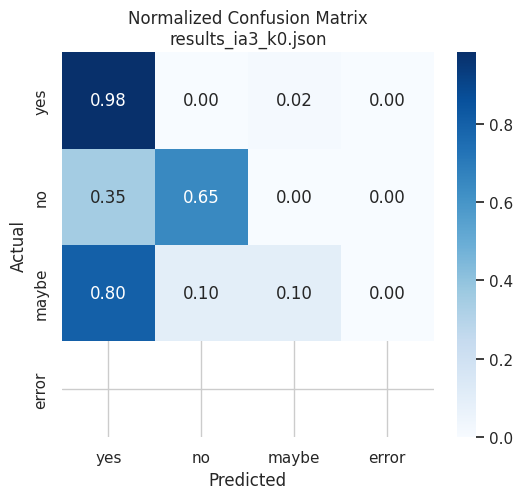

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


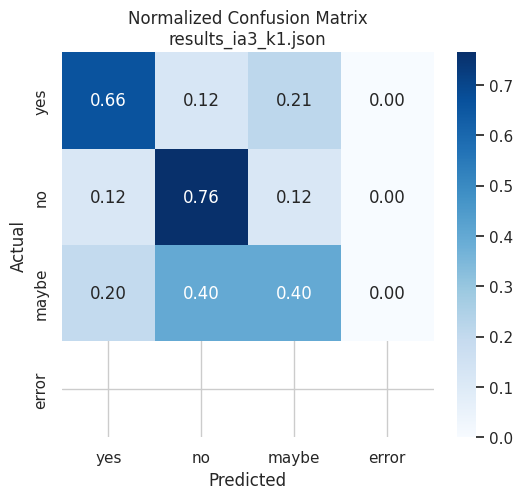

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


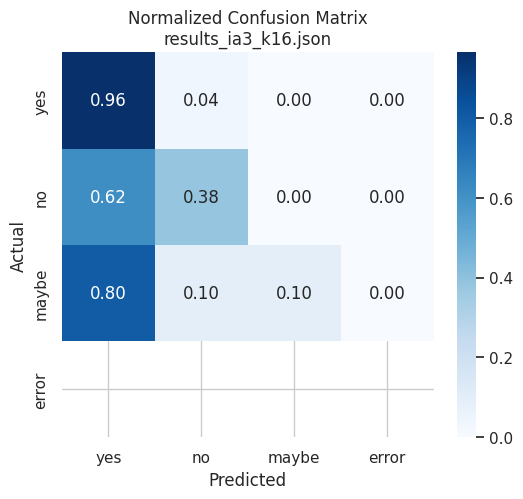

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


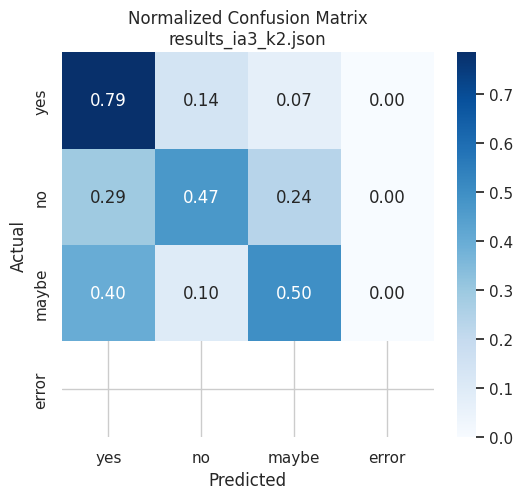

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


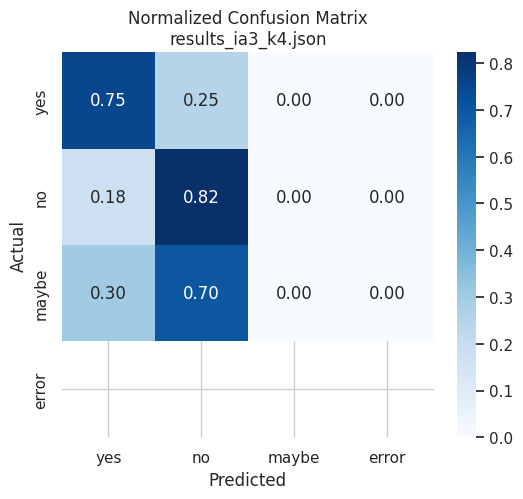

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


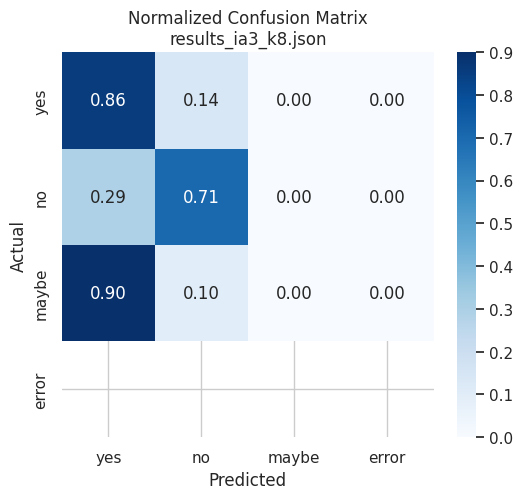

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


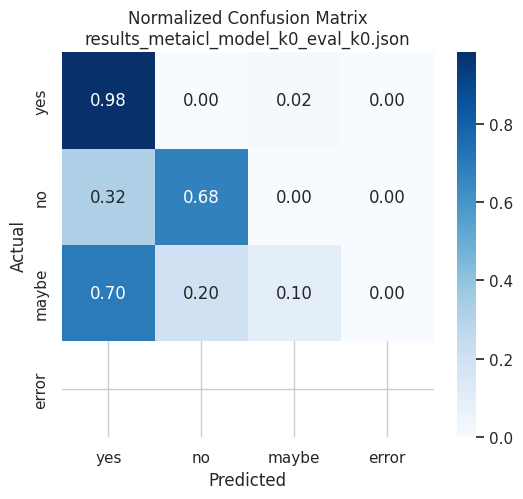

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


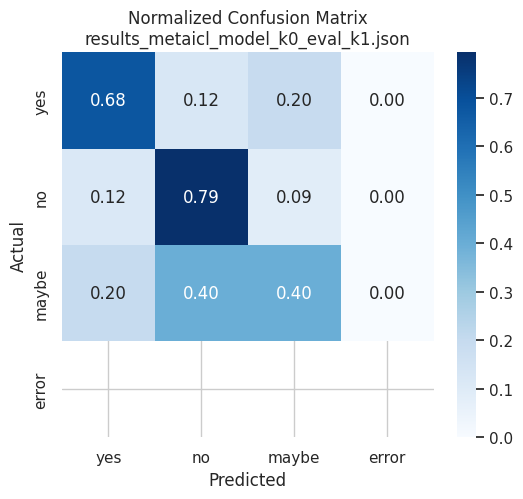

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


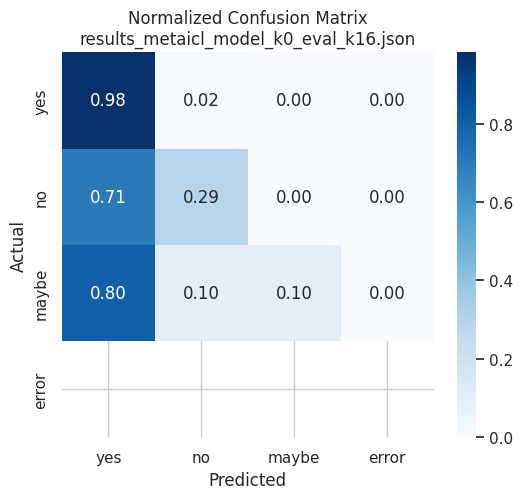

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


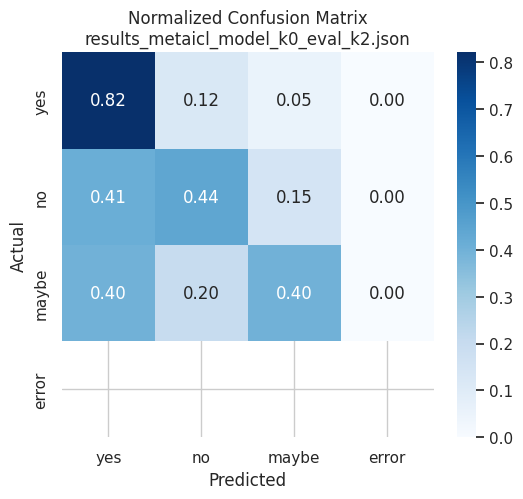

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


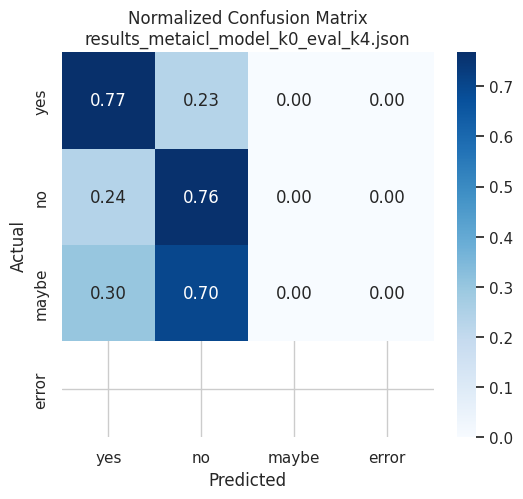

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


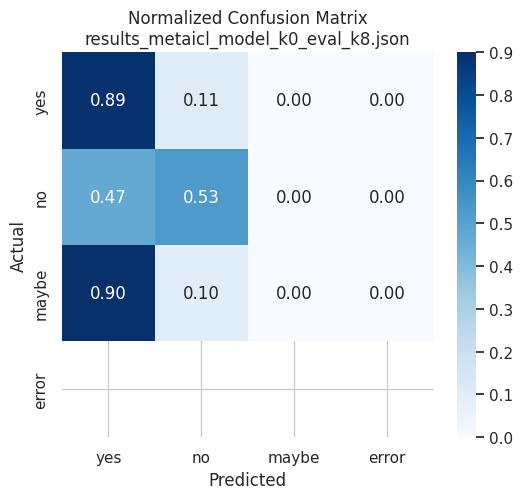

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


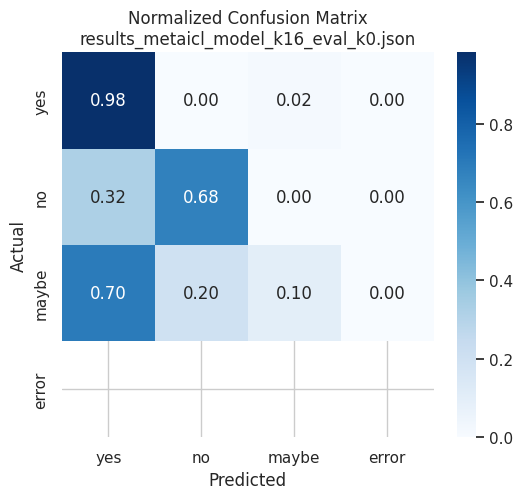

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


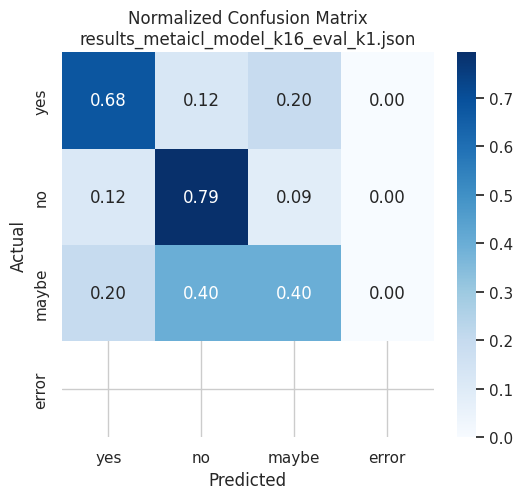

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


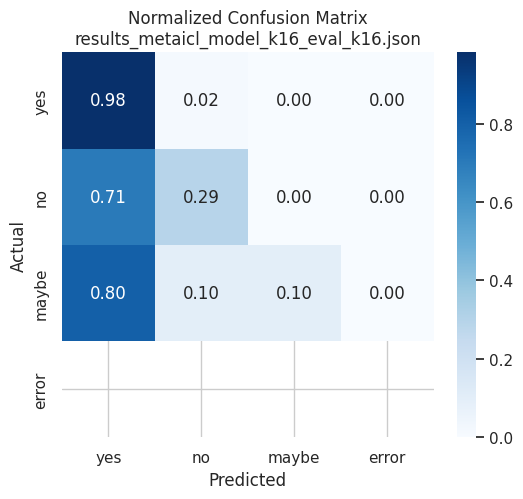

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


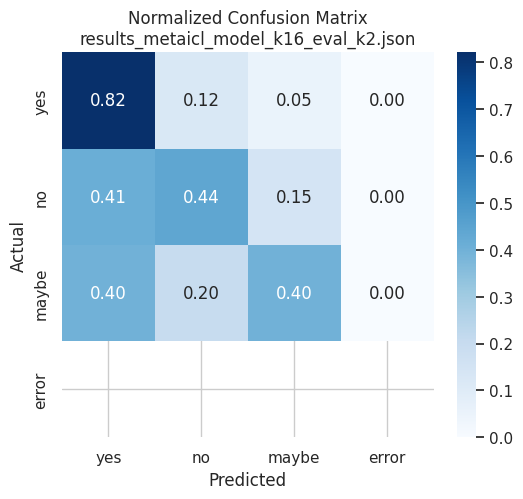

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


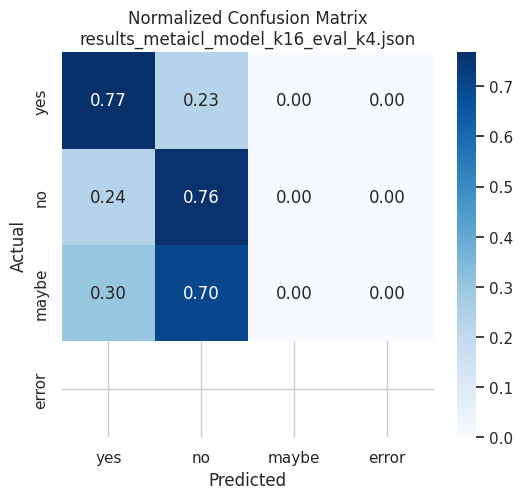

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


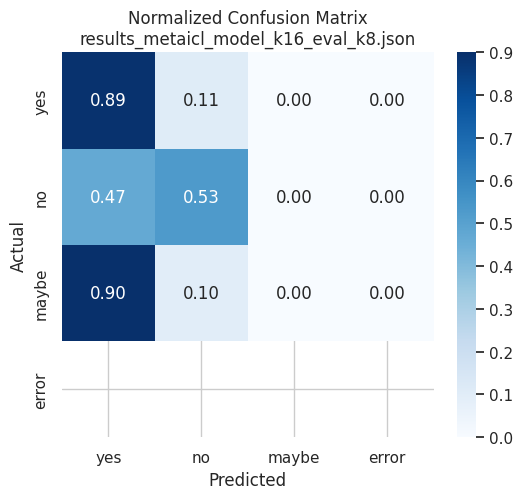

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


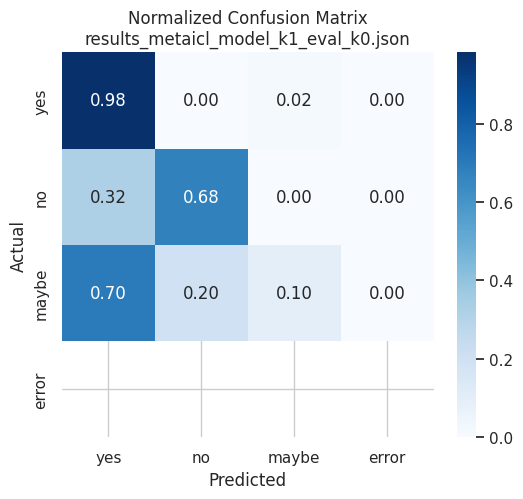

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


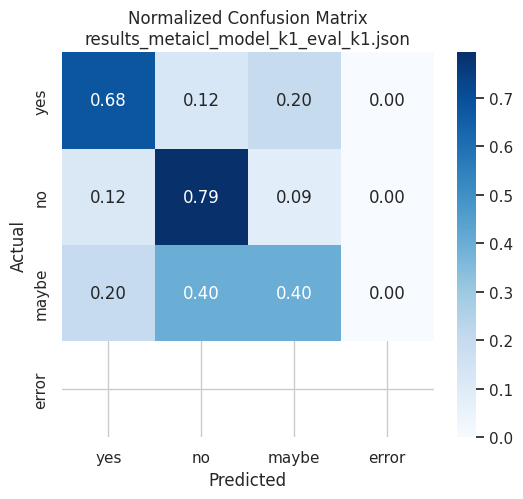

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


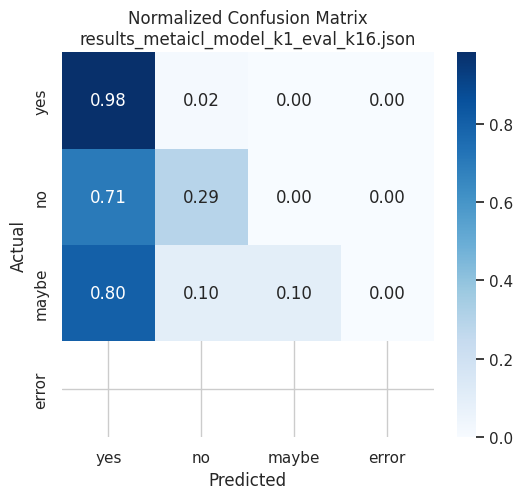

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


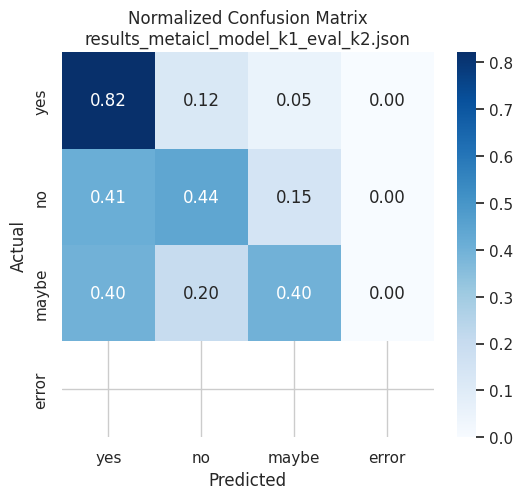

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


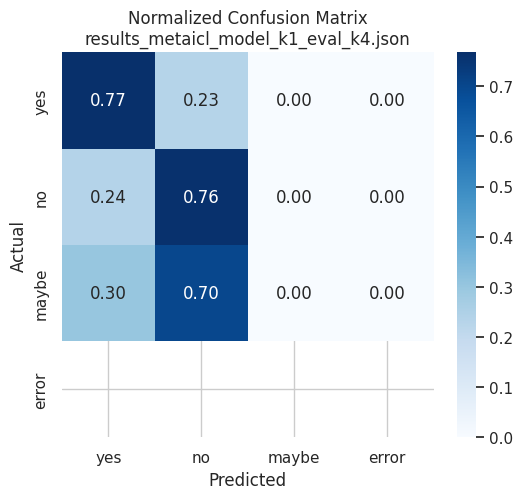

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


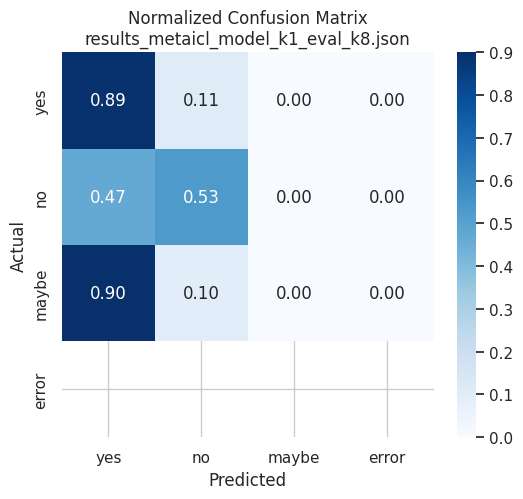

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


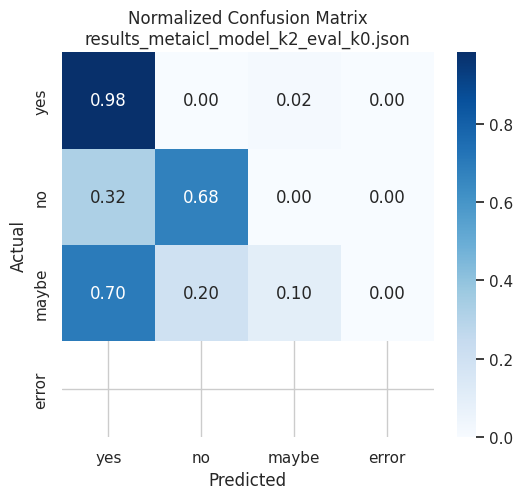

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


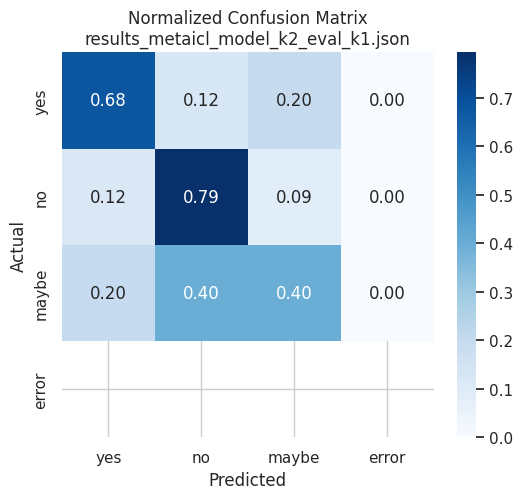

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


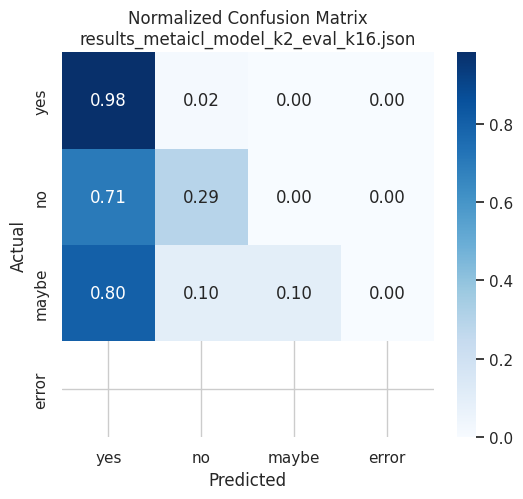

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


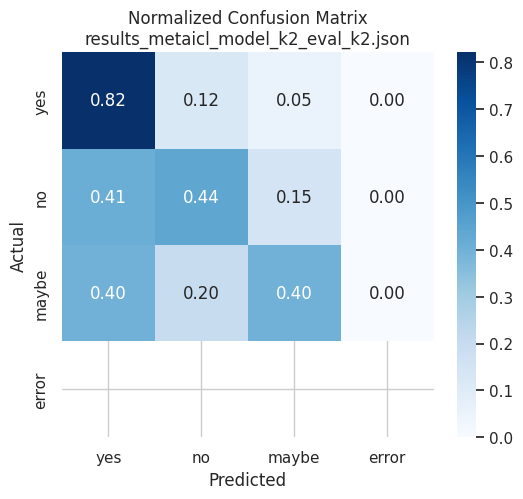

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


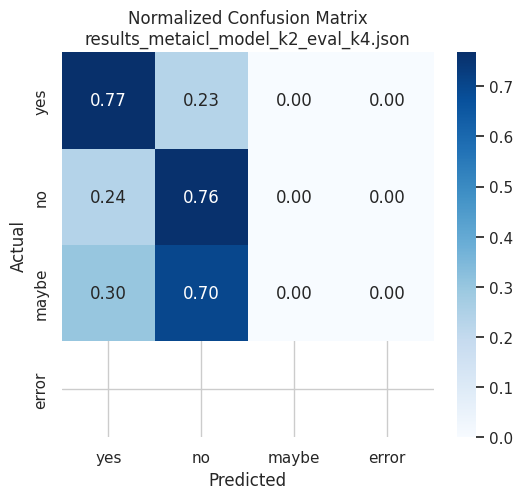

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


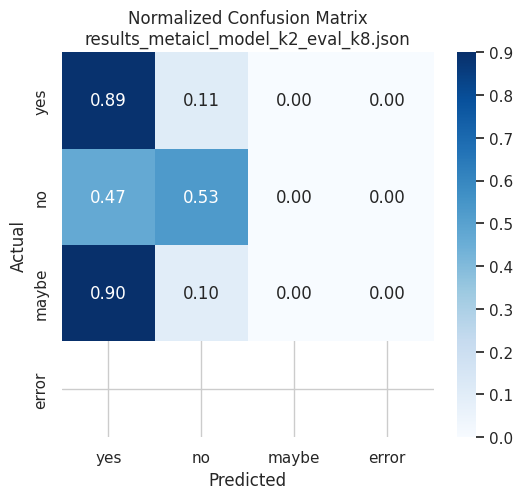

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


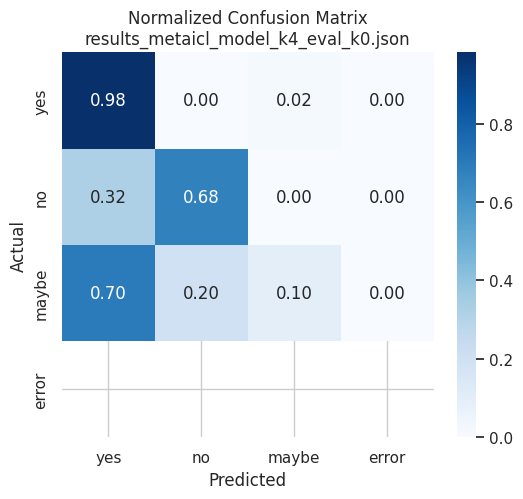

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


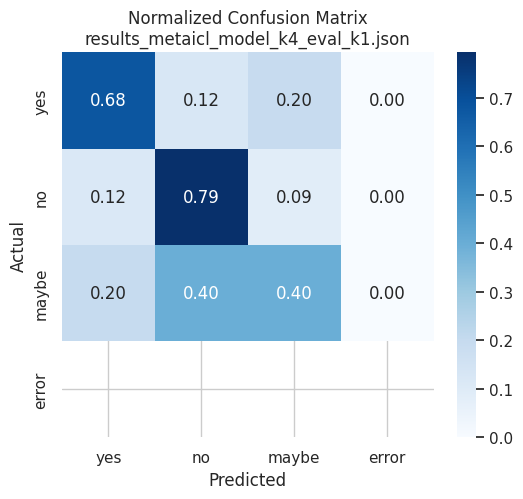

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


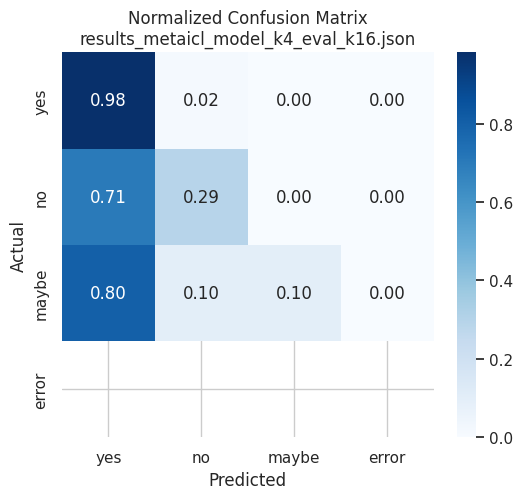

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


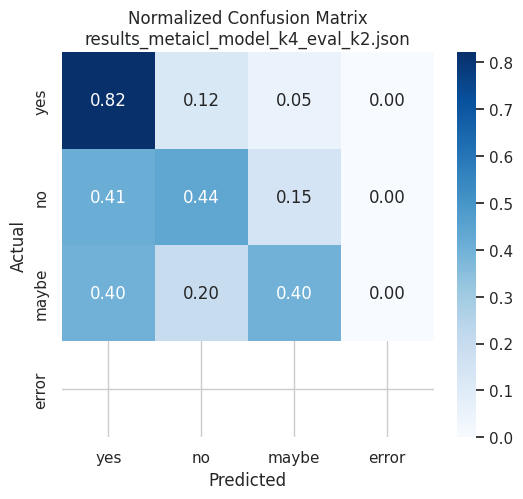

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


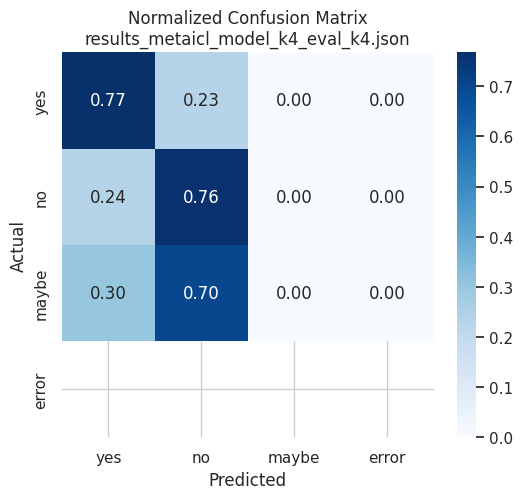

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


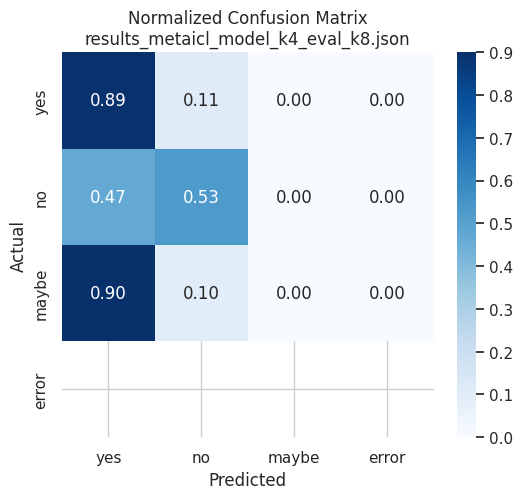

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


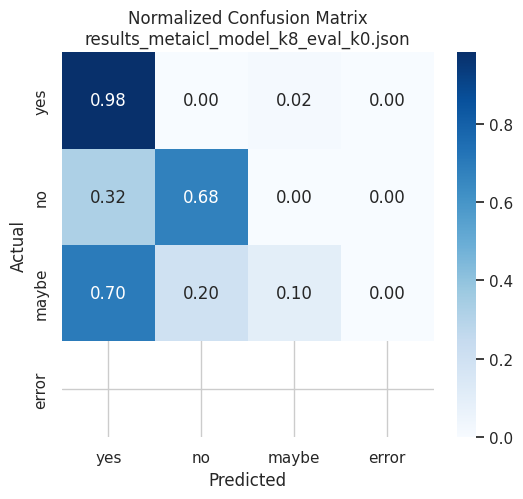

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


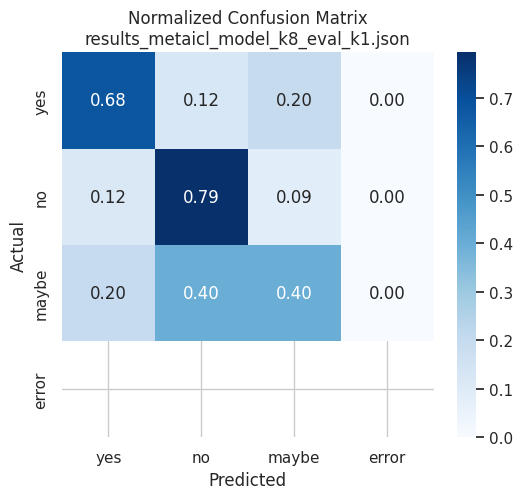

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


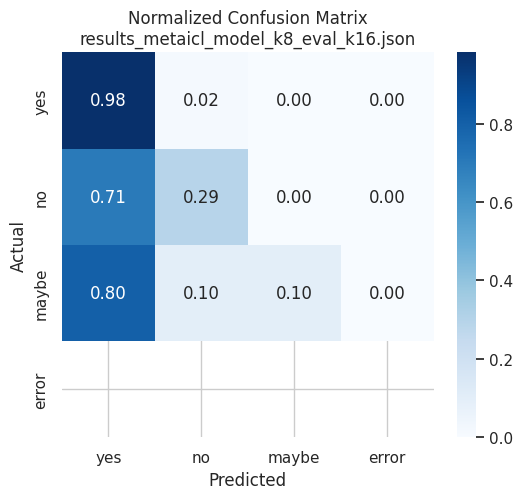

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


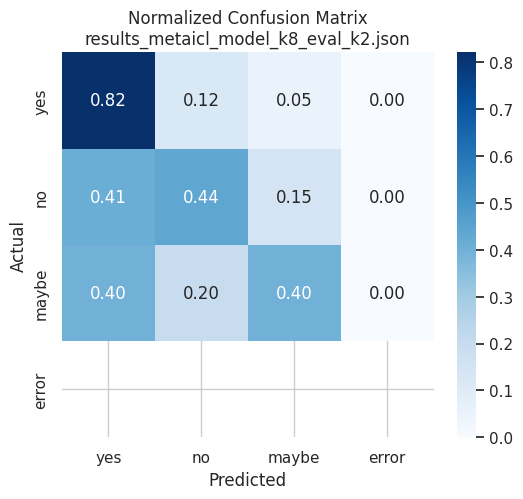

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


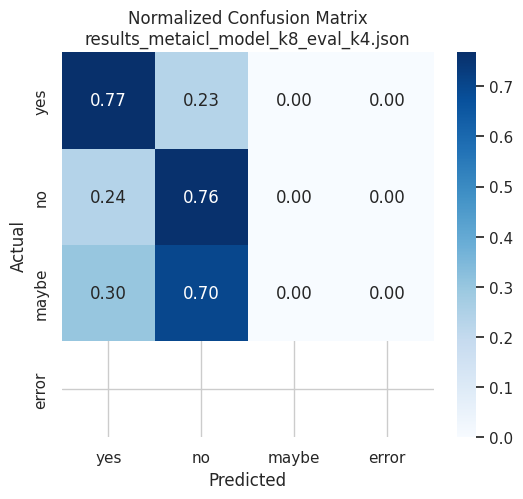

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


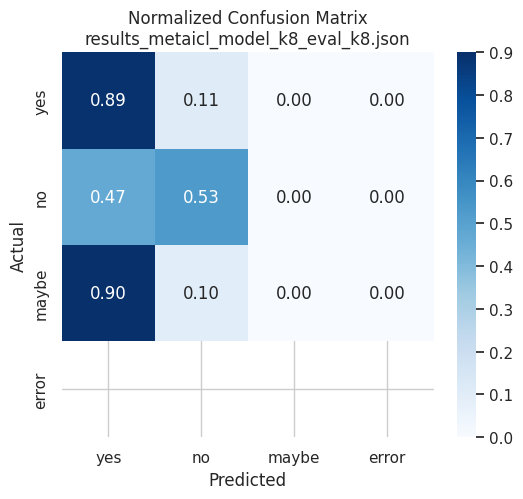

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


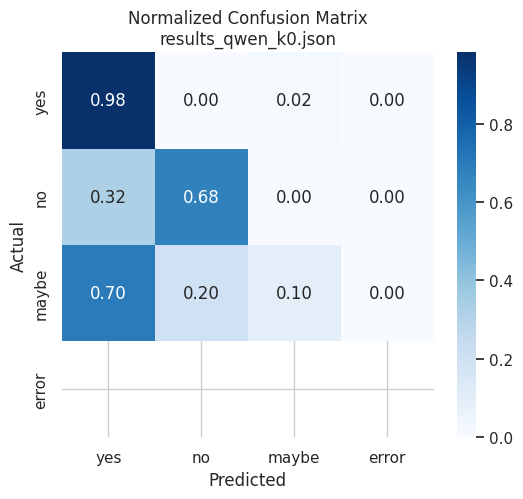

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


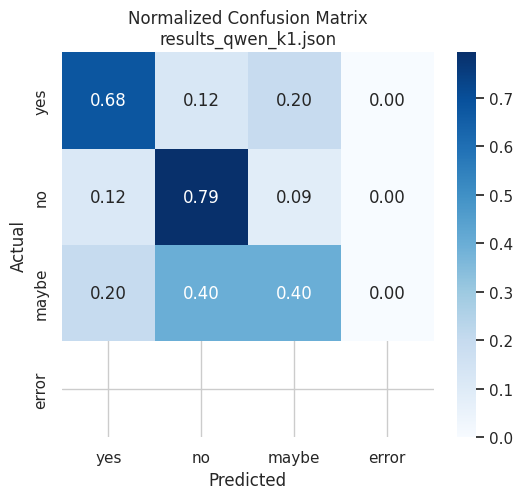

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


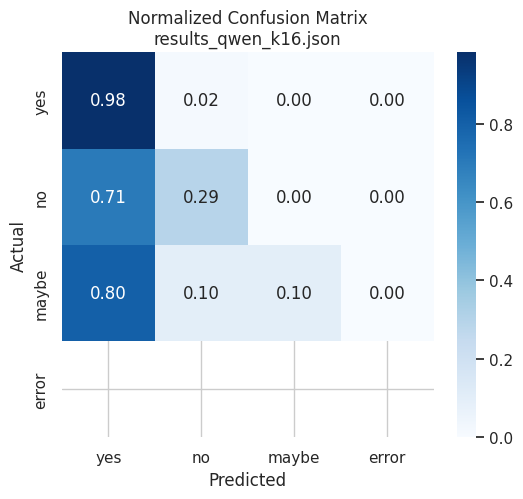

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


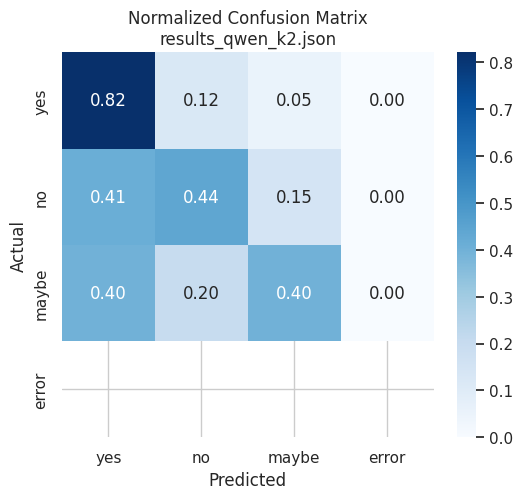

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


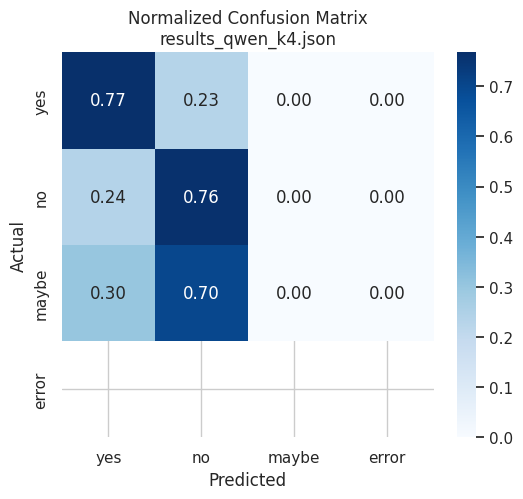

/tmp/ipykernel_3733/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


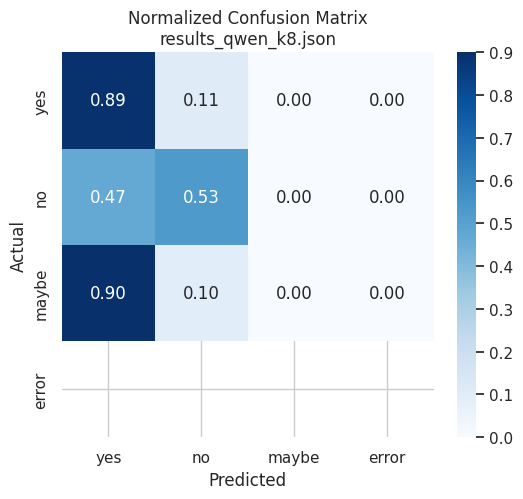

In [13]:
import json
import os
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 평가 결과가 저장된 폴더
results_dir = "../new_results"
result_files = sorted(glob.glob(os.path.join(results_dir, "results_*.json")))

def plot_confusion_matrix(y_true, y_pred, labels=None, normalize=False, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

def normalize_label(label):
    label = label.lower().strip()
    if label in {"yes", "no", "maybe"}:
        return label
    else:
        return "error"

def evaluate_result_file(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)
    preds = [normalize_label(ex["prediction"]) for ex in data]
    labels = [normalize_label(ex["label"]) for ex in data]
    return preds, labels

# 모든 파일에 대해 혼동 행렬 그리기
for filepath in result_files:
    y_pred, y_true = evaluate_result_file(filepath)
    filename = os.path.basename(filepath)
    plot_confusion_matrix(
        y_true, y_pred,
        labels=["yes", "no", "maybe", "error"],
        normalize=True,
        title=f"Normalized Confusion Matrix\n{filename}"
    )